In [4]:
import astropy.units as u

from fleck import generate_spots
import numpy as np

from altaipony.altai import aflare
import matplotlib.pyplot as plt

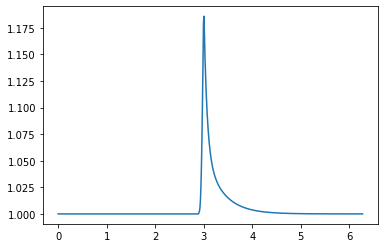

In [6]:
%matplotlib inline
t = np.arange(0, 2 * np.pi, 2 * np.pi/600) 
oneflare = aflare(t, 3, .2, .2) + 1
plt.plot(t,oneflare);

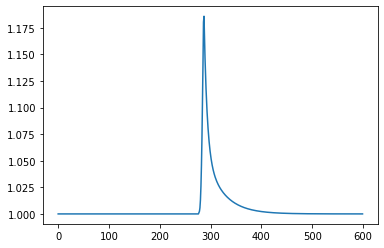

In [21]:
u_ld = [0.5079, 0.2239]

n_phases = 1
phases = t * u.rad
n_inclinations = 100
n_spots = 2

nspotflare = np.repeat(np.array([oneflare]), repeats=n_spots, axis=1)
nspotnincflare = np.repeat(np.array([nspotflare]), 
                           repeats=n_inclinations, axis=2).reshape((len(phases),n_spots,n_inclinations))
plt.plot(nspotnincflare[:,0,0])

In [22]:
spot_radius = 0.01   # Rspot/Rstar
min_latitude = 0  # deg
max_latitude = 10   # deg

lons, lats, radii, inc_stellar = generate_spots(min_latitude, max_latitude,
                                                spot_radius, n_spots,
                                                n_inclinations=n_inclinations)



In [23]:
from fleck import Star

star = Star(spot_contrast=nspotnincflare, phases=phases, u_ld=u_ld, n_phases=1)

In [24]:
plt.figure(figsize=(15,5))
lcs = star.light_curve(lons, lats, radii, inc_stellar)

<Figure size 1080x360 with 0 Axes>

In [25]:
lcs.shape

(600, 100)

In [26]:
star.phases

<Quantity [0.        , 0.01047198, 0.02094395, 0.03141593, 0.0418879 ,
           0.05235988, 0.06283185, 0.07330383, 0.0837758 , 0.09424778,
           0.10471976, 0.11519173, 0.12566371, 0.13613568, 0.14660766,
           0.15707963, 0.16755161, 0.17802358, 0.18849556, 0.19896753,
           0.20943951, 0.21991149, 0.23038346, 0.24085544, 0.25132741,
           0.26179939, 0.27227136, 0.28274334, 0.29321531, 0.30368729,
           0.31415927, 0.32463124, 0.33510322, 0.34557519, 0.35604717,
           0.36651914, 0.37699112, 0.38746309, 0.39793507, 0.40840704,
           0.41887902, 0.429351  , 0.43982297, 0.45029495, 0.46076692,
           0.4712389 , 0.48171087, 0.49218285, 0.50265482, 0.5131268 ,
           0.52359878, 0.53407075, 0.54454273, 0.5550147 , 0.56548668,
           0.57595865, 0.58643063, 0.5969026 , 0.60737458, 0.61784656,
           0.62831853, 0.63879051, 0.64926248, 0.65973446, 0.67020643,
           0.68067841, 0.69115038, 0.70162236, 0.71209433, 0.72256631,
      

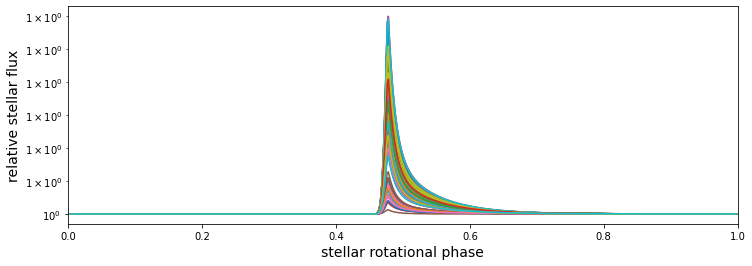

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(star.phases/2/np.pi, lcs)
plt.xlim(0,1)
plt.xlabel("stellar rotational phase", fontsize=14)
plt.ylabel("relative stellar flux", fontsize=14);